### Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import tensorflow as tf

from scipy.io import loadmat

from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#Importing the CNN related layers 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils



%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

### Import the data from google drive

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Loading the data

In [34]:

def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']
X_train, y_train = load_data("/content/gdrive/My Drive/train_32x32.mat")
X_test, y_test = load_data("/content/gdrive/My Drive/test_32x32.mat")

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)


Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


3

**Transposing the the train and test data
by converting it from  
(width, height, channels, size) -> (size, width, height, channels)**

In [36]:
# Transpose the image arrays if channel is not last
if (X_train.shape[3] != 3):
  X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
  X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)
Total Number of Images 99289


In [0]:
# a helper function to display images . Note that color and gray picture need different codes:

def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
          # for color
            ax.imshow(img[i]) 
        else:
          #for grayscale
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

If you want to see some of the images:

y_train is [1 9 2 ... 1 6 9]


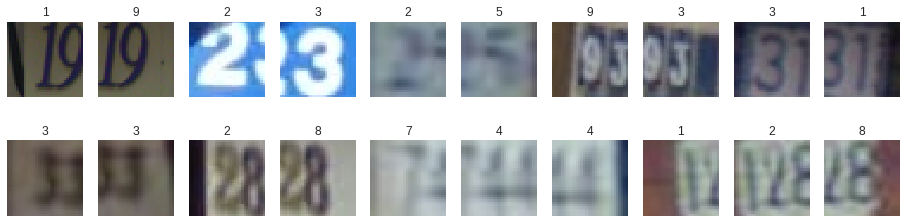

In [54]:
print("y_train is",y_train)
plot_images(X_train, y_train,2,10)


### print some of the test data

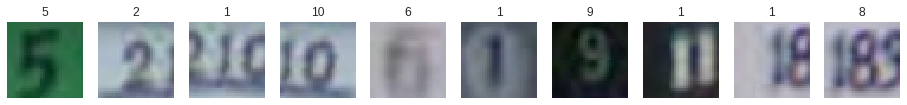

In [65]:
plot_images(X_test, y_test, 1, 10)


### Normalize the data

In [0]:
# scale the data:

X_train_norm = X_train/255
X_test_norm = X_test/255


## One Hot Label Encoding
Use Keras to make the label categorical

In [82]:

y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
num_classes = y_train_cat.shape[1]
print("the number of categorical classess is:",num_classes)

the number of categorical classess is: 11


### Getting the number, height and width of the images:

In [0]:
training_samples, height, width, channel = X_train_norm.shape
testing_samples,_,_,_  = X_test_norm.shape

### The model:

In [0]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(height,width ,channel), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the model**

In [0]:
model.fit(X_train_norm, y_train_cat, validation_data=(X_test_norm, y_test_cat),epochs=10, batch_size=100)

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73257/73257 [==============================] - 216s 3ms/step - loss: 1.0485 - acc: 0.6661 - val_loss: 0.5727 - val_acc: 0.8428
Epoch 2/10
22200/73257 [========>.....................] - ETA: 2:13 - loss: 0.5636 - acc: 0.8394

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
__________

In [0]:
# calculate the scores and loss function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
# Save entire model to a HDF5 file
model.save('/content/gdrive/My Drive/my_model.h5')